# Part D – DBSCAN Clustering (Python 3.12 Safe Version)

This notebook includes:
- A **repair cell** to fix environments broken by PyCaret.
- A clean **sklearn DBSCAN clustering workflow**.


Assignment Done by :- Dev Mulchandani

In [1]:
# 🔧 REPAIR CELL — Run this FIRST
# Fix corrupted NumPy/SciPy caused by incompatible PyCaret installs.
!pip install --upgrade --force-reinstall numpy==1.26.4 scipy==1.11.4
print("✔ Repair complete. Please restart runtime now (Runtime → Restart runtime).")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 30.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.8/35.8 MB 10.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.3
    Uninstalling scipy-1.16.3:
      Successfully uninstalled scipy-1.16.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
inequality 1.1.2 requires scipy>=1.12, but you have scipy 1.11.4 which is incompatib

✔ Repair complete. Please restart runtime now (Runtime → Restart runtime).


In [1]:
# 📤 Upload dataset AFTER restarting runtime
import pandas as pd
from google.colab import files

uploaded = files.upload()
fname = list(uploaded.keys())[0]
df = pd.read_csv(fname)
df.head()


Saving credit_default.csv to credit_default.csv


,limit_bal,sex,education,marriage,age,default_payment_next_month
0,28638,1,1,1,47,0
1,33166,1,3,3,68,0
2,29727,1,3,1,67,1
3,37059,1,1,2,60,0
4,31620,2,1,1,21,0


Cluster labels: {-1}
Clusters: 0
Noise points: 200


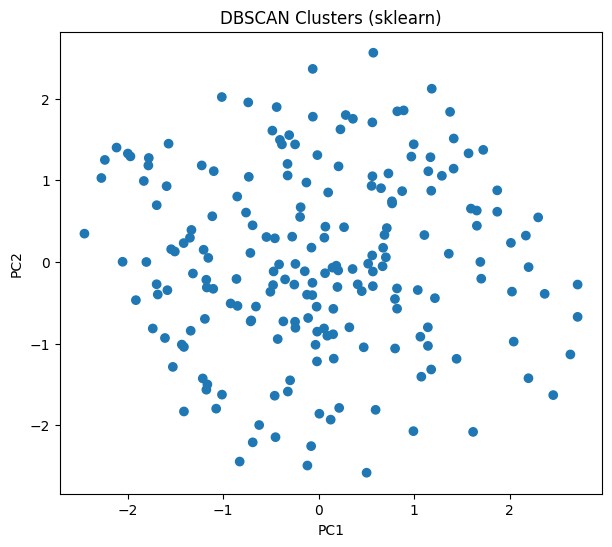

In [2]:
# ⭐ DBSCAN clustering using sklearn (PyCaret alternative)
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

X = df.select_dtypes(include=['float64','int64']).values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

db = DBSCAN(eps=0.5, min_samples=5).fit(X_scaled)
labels = db.labels_

print("Cluster labels:", set(labels))
print("Clusters:", len(set(labels)) - (1 if -1 in labels else 0))
print("Noise points:", list(labels).count(-1))

if len(set(labels)) > 1 and -1 not in set(labels):
    print("Silhouette:", silhouette_score(X_scaled, labels))

pca = PCA(n_components=2)
X_2d = pca.fit_transform(X_scaled)

plt.figure(figsize=(7,6))
plt.scatter(X_2d[:,0], X_2d[:,1], c=labels, cmap='tab10')
plt.title("DBSCAN Clusters (sklearn)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()
